In [14]:
# SETUP
## Importing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Random params
np.random.seed(0)
random_state = 338

## Plot params
%matplotlib inline
np.random.seed(0)
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

## Load train and test
# test = pd.read_csv('../test.csv', index_col='id')
dT = pd.read_csv('../train.csv', index_col='id')

## Calc stats
# stats = dT.describe()
# statsTarget = stats.pop('claim')
# stats = stats.transpose()
dT['na'] = dT.isna().sum(axis=1)
y = dT['claim']

In [15]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(dT.drop('claim',axis = 1), y, test_size=0.3, random_state=42)

In [16]:
X

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,na
id,,,,,,,,,,,,,,,,,,,,,
597603,0.085673,0.481730,739.45,0.635710,0.466740,-0.37443,1165.30000,245340.0,5.097700e+13,2575.9000,...,-20.06100,3.8656,-0.327220,16.0230,6600.7,1.2114,3.211100e+15,3803.1,0.50259,4
84239,0.098415,0.315240,210.12,0.144660,0.364110,-0.45971,889.36000,98282.0,4.146600e+15,4102.4000,...,-12.33400,1.3317,3.249300,5.9380,253610.0,1.1471,6.759600e+16,1938.9,0.14640,6
894388,0.083652,0.486570,1382.50,0.018089,0.365990,-0.94239,-0.35531,478920.0,1.310600e+15,-74.0970,...,-0.51157,1.9954,-1.293000,2.9085,114180.0,1.3313,-2.411300e+15,6870.8,0.51898,0
927182,0.066852,0.466020,-6187.40,0.130910,0.155220,2.08820,726.93000,173400.0,4.682500e+15,9334.6000,...,-1.03980,3.8234,-0.103210,-2.2393,4644.0,1.0542,7.974100e+15,10222.0,1.05290,2
621979,0.026576,0.434800,602.28,0.208090,0.424320,2.87890,140.78000,42570.0,6.408400e+12,11104.0000,...,-33.14900,2.7110,-0.304320,-9.9165,12740.0,1.1282,5.685800e+15,7978.6,0.31172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.041635,0.407250,3375.40,0.145470,0.397730,-1.08930,4261.70000,385840.0,8.478400e+14,-21.7400,...,-89.38900,1.1241,-2.209400,1.0617,43851.0,1.2140,1.970300e+16,4436.0,0.38829,2
365838,0.100770,0.412930,786.42,0.249260,0.323640,-2.12760,2017.20000,131350.0,8.203100e+14,-8.9756,...,-26.20900,1.4040,116.520000,3.3061,2670.1,1.1996,1.633700e+16,7971.9,0.25598,0
131932,0.017046,0.501210,829.68,0.059774,NaN,-2.80250,2129.10000,113950.0,6.166800e+14,-424.5500,...,-11.62900,3.1427,-0.011125,38.3770,55013.0,NaN,3.807200e+16,2795.1,0.51059,3


In [17]:
y

id
597603    1
84239     0
894388    0
927182    1
621979    0
         ..
259178    1
365838    0
131932    1
671155    1
121958    1
Name: claim, Length: 670543, dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler as mms
mmslr = mms()
mmslr.fit(X)
scaled = pd.DataFrame(mmslr.transform(X))
scaled.index = X.index
scaled.columns = X.columns
X['sei_la'] = scaled.sum(axis=1)
X['na_pct'] = (X.isna().sum(axis=1)/X.count(axis=1) * 100)

In [36]:
mmslra = mms()
mmslra.fit(dT)
scaleda = pd.DataFrame(mmslra.transform(dT))
scaleda.index = dT.index
scaleda.columns = dT.columns
scaleda['sei_la'] = scaleda.sum(axis=1)
scaleda['nova'] = np.where(scaleda['sei_la']>=scaleda.loc[scaleda['claim']==1]['sei_la'].mean(),1,0)
scaleda['nova'] = np.where(scaleda['sei_la']<scaleda.loc[scaleda['claim']==0]['sei_la'].mean(),-1,scaleda['nova'])

X['nova']= scaleda['nova']

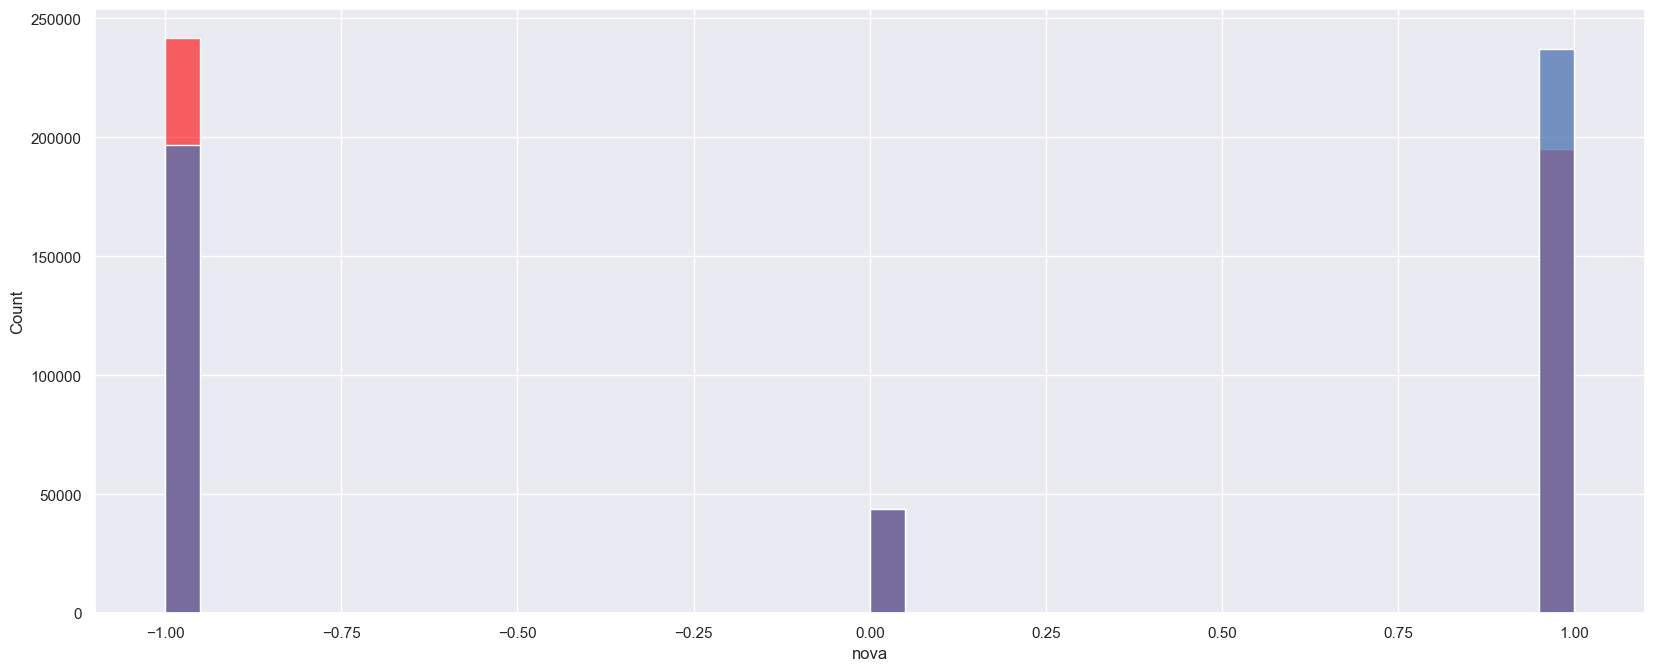

In [20]:
sns.histplot(data = scaleda.loc[scaleda['claim']==0]['nova'],alpha = 0.6, color = 'red');
sns.histplot(data = scaleda.loc[scaleda['claim']==1]['nova']);

In [10]:
# dummy = pd.DataFrame(X[])
# mmslra.fit(scaleda['sei_la'].values.reshape(-1,1))

# X['na_pct'] = (X.isna().sum(axis=1)/X.count(axis=1) * 100)

Text(0.5, 0, 'nova feature ?')

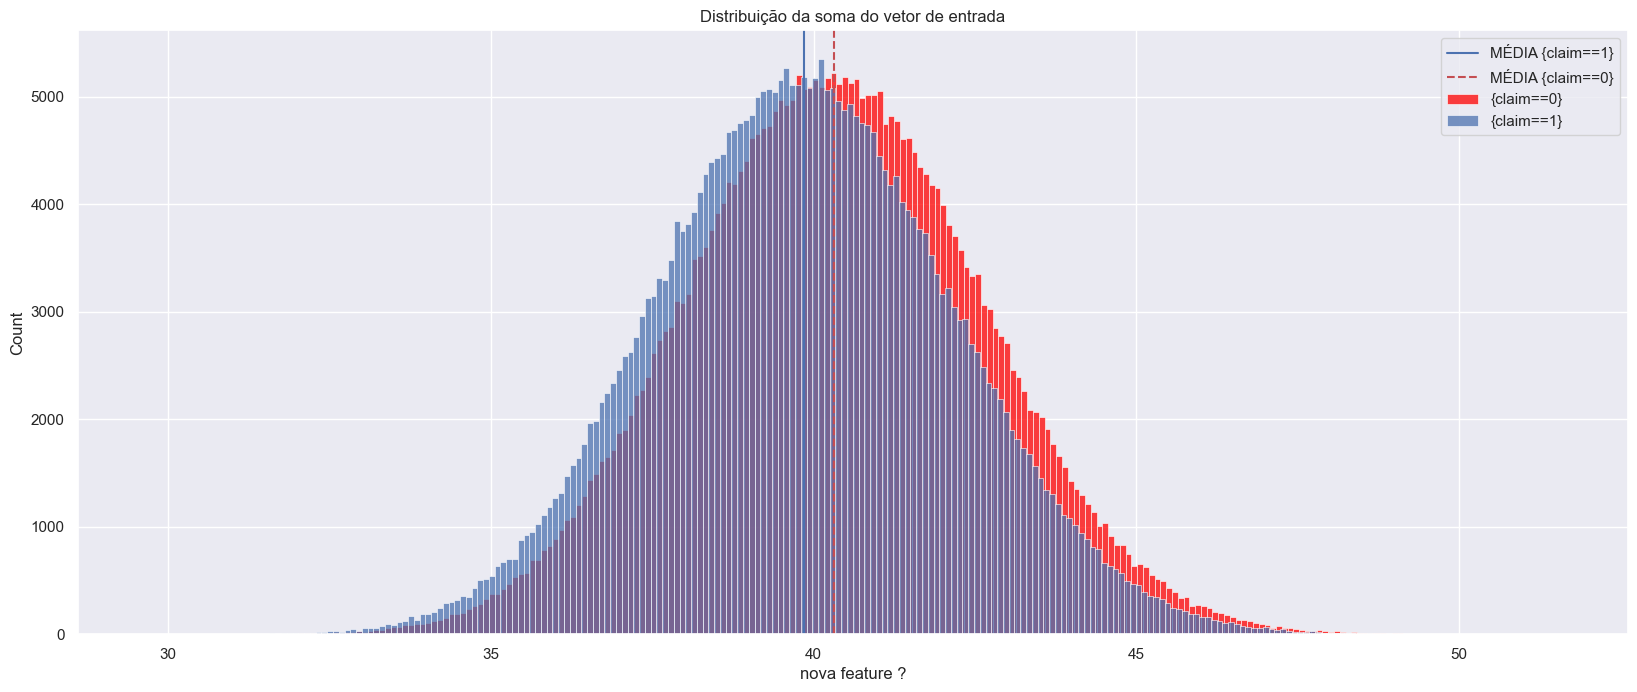

In [21]:
sns.histplot(data = X.loc[scaleda['claim']==0]['sei_la'], color = 'red');
sns.histplot(data = X.loc[scaleda['claim']==1]['sei_la']);
plt.axvline(X.loc[scaleda['claim']==1]['sei_la'].mean());
plt.axvline(X.loc[scaleda['claim']==0]['sei_la'].mean(), linestyle = '--', color = 'r');
plt.title('Distribuição da soma do vetor de entrada')
plt.legend(['MÉDIA {claim==1}','MÉDIA {claim==0}','{claim==0}','{claim==1}']);
plt.xlabel('nova feature ?')

In [22]:
mmslr2 = mms()
mmslr2.fit(X_test)
scaledTeste = pd.DataFrame(mmslr2.transform(X_test))
scaledTeste.index = X_test.index
scaledTeste.columns = X_test.columns

X_test['na'] = X_test.isna().sum(axis=1)
X_test['sei_la'] = scaledTeste.sum(axis=1)
X_test['na_pct'] = (X_test.isna().sum(axis=1)/X_test.count(axis=1) * 100)
scaledTeste['nova'] = np.where(X_test['sei_la']>=scaleda.loc[scaleda['claim']==1]['sei_la'].mean(),1,0)
scaledTeste['nova'] = np.where(X_test['sei_la']<scaleda.loc[scaleda['claim']==0]['sei_la'].mean(),-1,scaledTeste['nova'])

X_test['nova'] =scaledTeste['nova']
X_test['sei_la'] = X_test['sei_la']/X_test['sei_la'].max()
X['sei_la'] = X['sei_la']/X['sei_la'].max()

In [23]:
scaleda.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f113,f114,f115,f116,f117,f118,claim,na,sei_la,nova
count,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,942546.000000,942670.000000,942696.000000,...,942686.000000,942481.000000,942360.000000,942330.000000,942512.000000,942707.000000,957919.000000,957919.000000,957919.000000,957919.000000
mean,0.424915,0.678410,0.275508,0.202091,0.555166,0.530136,0.326582,0.209415,0.255617,0.283215,...,0.381161,0.238690,0.309350,0.154861,0.322451,0.245439,0.498492,0.135769,40.610170,-0.006909
std,0.077093,0.271824,0.131027,0.151574,0.258736,0.088517,0.225835,0.177733,0.201705,0.089875,...,0.135701,0.152025,0.117134,0.201610,0.232636,0.141088,0.499998,0.144774,2.320310,0.953281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.123966,-1.000000
25%,0.389568,0.561478,0.200960,0.083600,0.440613,0.486404,0.124986,0.062284,0.100613,0.236373,...,0.297461,0.138843,0.246100,0.027480,0.126891,0.147780,0.000000,0.000000,39.031994,-1.000000
50%,0.424798,0.758584,0.218545,0.156290,0.595970,0.517271,0.295661,0.164397,0.143177,0.245275,...,0.369552,0.166861,0.277075,0.066538,0.268552,0.215791,0.000000,0.071429,40.589513,0.000000
75%,0.471455,0.887479,0.283180,0.270482,0.747356,0.571539,0.481421,0.303777,0.367650,0.286516,...,0.449651,0.280358,0.343101,0.184861,0.483048,0.310017,1.000000,0.214286,42.163851,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.526519,1.000000


In [24]:
X_test.sort_values(by = 'id')

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f113,f114,f115,f116,f117,f118,na,sei_la,na_pct,nova
id,,,,,,,,,,,,,,,,,,,,,
0,0.108590,0.004314,-37.566,0.017364,0.289150,-10.25100,135.120,168900.0,3.992400e+14,86.489,...,-7.1157,4378.8,1.2096,8.613400e+14,140.100,1.01770,1,0.785171,0.840336,-1
7,0.097340,0.245910,11775.000,0.614860,0.479370,-1.48650,3179.200,123940.0,1.652900e+15,504.400,...,1.5156,1117.5,1.2468,-6.971300e+13,1481.700,0.30317,1,0.726948,0.840336,-1
10,0.121570,0.275670,NaN,0.006199,0.473720,0.58200,2044.100,1117000.0,3.895900e+13,43043.000,...,-20.5090,69084.0,1.3961,7.217100e+16,523.190,0.86224,8,0.791219,7.142857,-1
12,0.081278,0.302320,1341.000,0.516860,0.394170,-1.54560,105.600,1045900.0,-2.677900e+12,8658.600,...,-8.4471,6079.1,1.1926,1.759800e+16,6521.700,0.95150,3,0.737762,2.564103,-1
14,0.072488,0.473410,-22.274,0.002846,0.384460,3.54840,-40.267,739910.0,4.615400e+15,100.200,...,1.0531,1806.4,1.2229,6.537300e+15,591.480,0.30038,0,0.833947,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957905,0.151540,0.364640,638.500,0.088743,0.397610,-1.33450,876.360,431550.0,1.300300e+15,923.230,...,-6.3758,98568.0,1.1749,4.014400e+15,6780.400,0.48229,0,0.743786,0.000000,-1
957910,0.102000,0.426460,-187.990,0.109040,-0.004372,4.11130,377.860,7770.8,4.943600e+13,2515.400,...,-15.2840,213470.0,1.1392,7.059700e+16,3190.300,0.59345,0,0.795266,0.000000,0
957911,0.072651,-0.011568,1916.800,0.038723,0.330100,-0.15394,681.880,104710.0,6.897600e+14,-11.001,...,2.5395,269000.0,1.5845,2.797400e+14,29.983,0.46625,0,0.727613,0.000000,-1


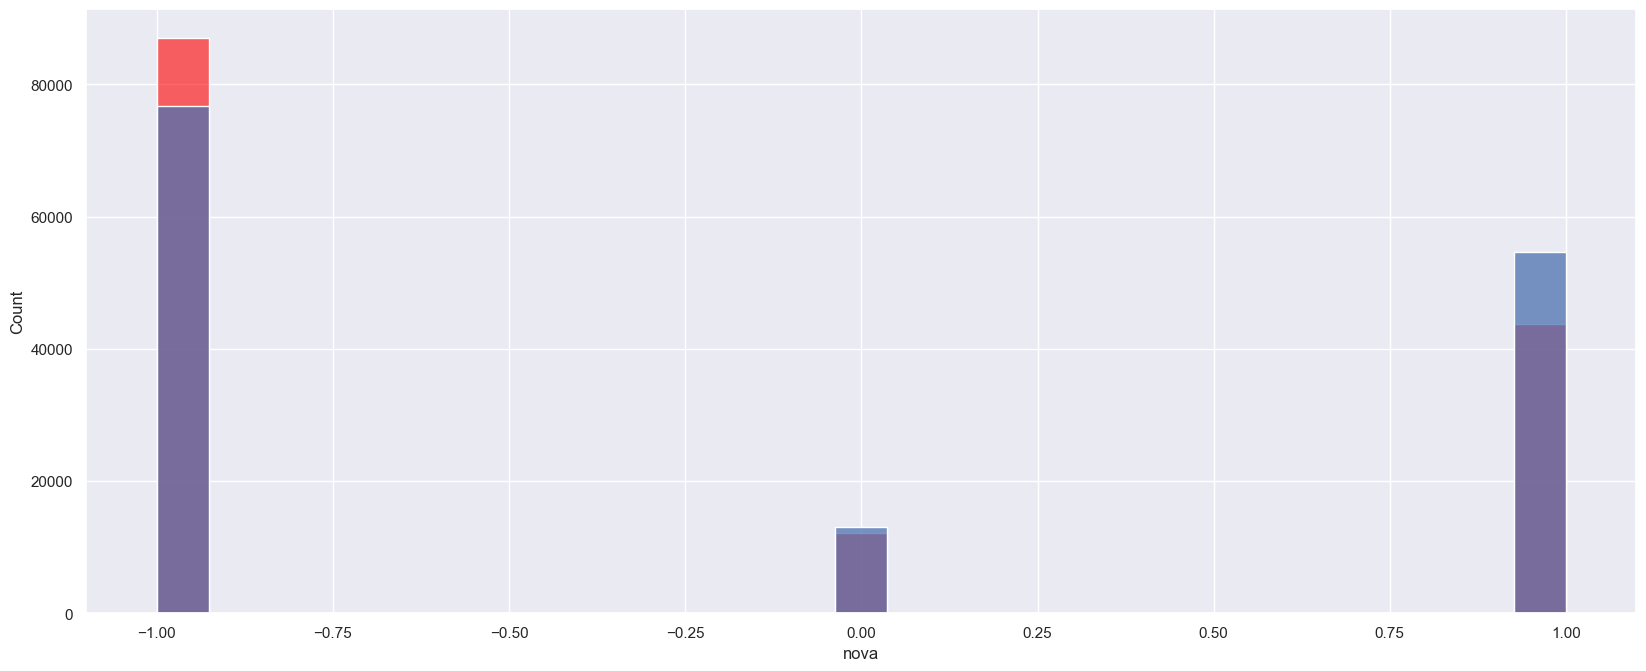

In [25]:
sns.histplot(data = X_test.iloc[np.where(y_test.values == 1)[0][:],-1],alpha = 0.6, color = 'red');
sns.histplot(data = X_test.iloc[np.where(y_test.values == 0)[0][:],-1]);
# sns.histplot(data = scaleda.loc[scaleda['claim']==1]['sei_la']);
# plt.axvline(scaleda.loc[scaleda['claim']==1]['sei_la'].mean());
# plt.axvline(scaleda.loc[scaleda['claim']==0]['sei_la'].mean(), linestyle = '--', color = 'r');

In [37]:
scaleda['sei_la']= scaleda['sei_la']/scaleda['sei_la'].max()
scaleda.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f113,f114,f115,f116,f117,f118,claim,na,sei_la,nova
id,,,,,,,,,,,,,,,,,,,,,
0,0.457457,0.043413,0.191647,0.070959,0.527183,0.105864,0.063687,0.102258,0.134102,0.236467,...,0.261928,0.142026,0.310088,0.029364,0.040935,0.403801,1.0,0.071429,0.783537,1
1,0.443849,0.592256,0.433849,0.255789,0.830794,0.498215,0.344463,0.077000,0.434246,0.324546,...,0.413351,0.136327,0.347585,0.049469,0.167787,0.150209,0.0,0.000000,0.824914,1
2,0.580343,0.022422,0.210943,0.252679,0.830402,0.540336,0.446403,0.200918,0.100675,0.376975,...,0.467008,0.209030,0.276260,0.027749,0.313531,0.192805,1.0,0.357143,0.707989,-1
3,0.534915,0.048887,0.208346,0.076533,0.937195,0.845347,0.059686,0.148869,0.106339,0.235366,...,0.137909,0.142970,0.278298,0.026798,0.390996,0.230099,1.0,0.142857,0.787812,1
4,0.470978,0.970095,0.190185,0.271060,0.626428,0.516054,0.489029,0.048970,0.264354,0.236982,...,0.351838,0.141167,0.588661,0.026758,NaN,0.131866,1.0,0.571429,0.777011,0


In [38]:
X = scaleda.drop('nova',axis = 1).copy()
y = X.pop('claim')

In [41]:
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f111,f112,f113,f114,f115,f116,f117,f118,na,sei_la
id,,,,,,,,,,,,,,,,,,,,,
0,0.457457,0.043413,0.191647,0.070959,0.527183,0.105864,0.063687,0.102258,0.134102,0.236467,...,0.343019,0.120557,0.261928,0.142026,0.310088,0.029364,0.040935,0.403801,0.071429,0.783537
1,0.443849,0.592256,0.433849,0.255789,0.830794,0.498215,0.344463,0.077000,0.434246,0.324546,...,0.907318,0.114198,0.413351,0.136327,0.347585,0.049469,0.167787,0.150209,0.000000,0.824914
2,0.580343,0.022422,0.210943,0.252679,0.830402,0.540336,0.446403,0.200918,0.100675,0.376975,...,0.216179,0.113851,0.467008,0.209030,0.276260,0.027749,0.313531,0.192805,0.357143,0.707989
3,0.534915,0.048887,0.208346,0.076533,0.937195,0.845347,0.059686,0.148869,0.106339,0.235366,...,0.417911,0.116023,0.137909,0.142970,0.278298,0.026798,0.390996,0.230099,0.142857,0.787812
4,0.470978,0.970095,0.190185,0.271060,0.626428,0.516054,0.489029,0.048970,0.264354,0.236982,...,0.292096,0.117449,0.351838,0.141167,0.588661,0.026758,NaN,0.131866,0.571429,0.777011


In [42]:
X_test = X_test.drop(['nova','na_pct'],axis=1)
X_test.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f111,f112,f113,f114,f115,f116,f117,f118,na,sei_la
id,,,,,,,,,,,,,,,,,,,,,
682721,0.090452,NaN,1159.10,0.061711,-0.001278,NaN,1776.900,884250.0,7.183000e+15,1557.50,...,1.2420,7.5888,3.2722,21347.00,1.1392,2.630500e+16,9856.3,0.28264,4,0.719611
470979,0.101340,0.33936,5135.10,0.026545,0.452970,-0.89323,325.060,625440.0,3.302400e+15,46176.00,...,1.3087,4.1902,3.9285,22707.00,1.3137,8.625500e+16,1113.4,0.67445,2,0.681817
394613,0.089833,0.34838,267.65,0.258370,0.289470,-0.55578,2574.100,543770.0,1.207300e+15,7527.30,...,1.6501,3.0347,-14.7140,1276.80,1.4042,2.582200e+17,2444.2,0.15358,4,0.824142
329967,0.060176,0.38448,686.14,0.469660,0.379170,-7.25790,1435.800,25703.0,9.066400e+13,790.37,...,1.5221,1.6269,-9.7697,221.75,1.1908,8.960300e+13,2168.4,0.64688,0,0.780509
711757,0.101090,0.35936,11966.00,0.044494,0.221100,2.65720,39.691,622360.0,3.004000e+14,968.75,...,2.5587,-2.0261,1.8200,27393.00,1.2971,9.521400e+15,11143.0,0.26185,0,0.754007


In [43]:
from sklearn.model_selection import StratifiedKFold 
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

final_predictions = []
history =[]

# X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

skf = StratifiedKFold(n_splits=5, random_state=random_state, shuffle=True)
skf.get_n_splits(X, y)

for fold, (train_indicies, valid_indicies) in enumerate(skf.split(X=X,y=y)):
    X_train = X.iloc[train_indicies]
    X_valid = X.iloc[valid_indicies]
    X_test = X_test.copy()

    y_train = y.iloc[train_indicies]
    y_valid = y.iloc[valid_indicies]

    catBOOST = CatBoostClassifier(
            iterations=1000,
                        task_type="GPU",
                        devices='0:1',
                        eval_metric='AUC'
                        )
    catBOOST.fit(X_train,
            y_train,
            verbose=False,
            plot=True)

    preds_valid = catBOOST.predict_proba(X_valid)[:,1]
    preds_test = catBOOST.predict_proba(X_test)[:,1]

    final_predictions.append(preds_test)
    history.append([fold, roc_auc_score(y_valid, preds_valid)])
    print(history[-1])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[0, 0.8625860044268197]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[1, 0.8645558166795166]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[2, 0.8627021971296571]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[3, 0.8638895025797232]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[4, 0.8634026972294631]


In [44]:
np.mean(history,0)

array([2.        , 0.86342724])

[[0, 0.8625860044268197], [1, 0.8645558166795166], [2, 0.8627021971296571], [3, 0.8638895025797232], [4, 0.8634026972294631]]
0.8645558166795166
0.7701769526882227


<AxesSubplot:ylabel='Count'>

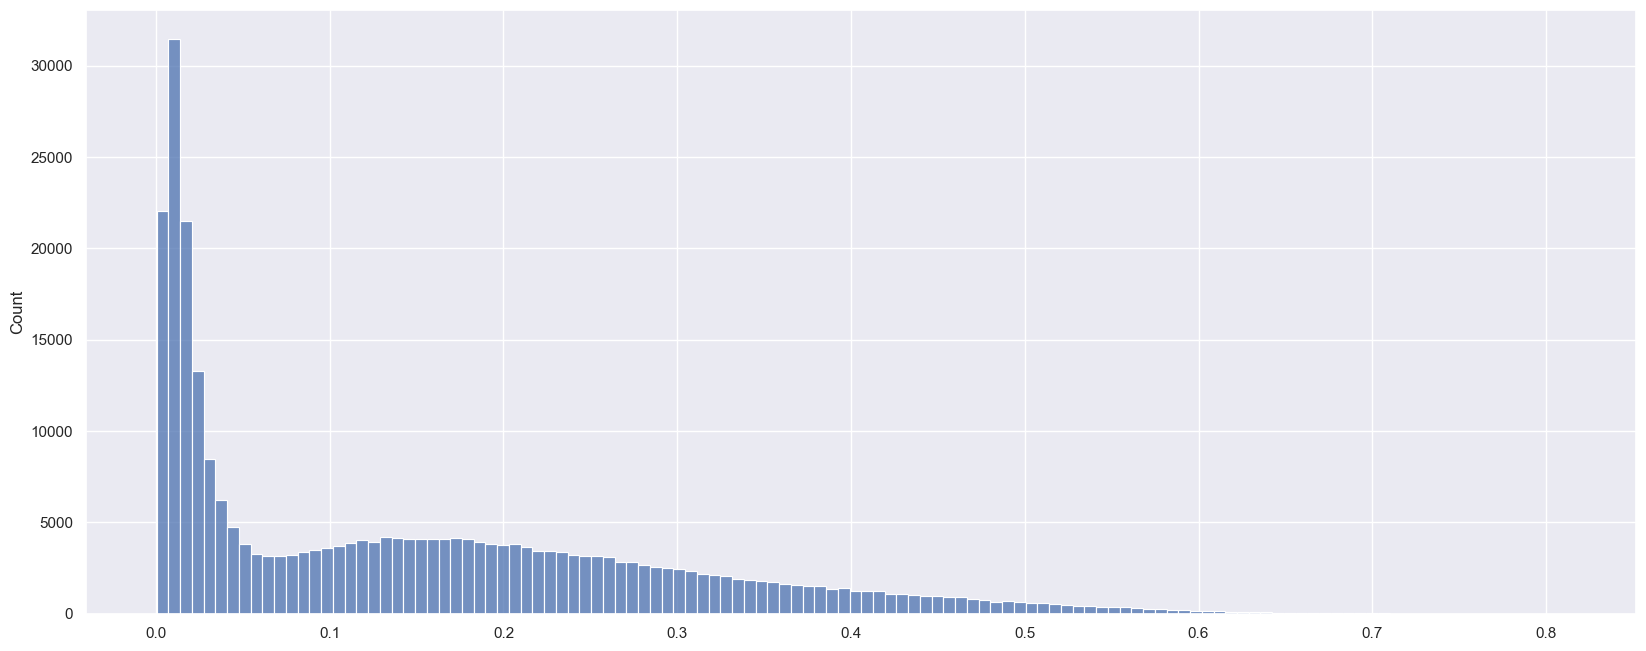

In [45]:
print(history)

maior =0.0
for ii in range(len(history)):
    if history[ii][1]>maior:
        maior = history[ii][1]
        max_index = ii

print(history[max_index][1])
sub = final_predictions[:][max_index]
print(roc_auc_score(y_test,sub))
sns.histplot(data = sub)